[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


   Unnamed: 0 label                                               text  \
0         605   ham  subject enron methanol meter 988291 follow not...   
1        2349   ham  subject hpl nom january 9 2001 see attached fi...   
2        3624   ham  subject neon retreat ho ho ho around wonderful...   
3        4685  spam  subject photoshop windows office cheap main tr...   
4        2030   ham  subject indian springs deal book teco pvr reve...   

   label_num  
0          0  
1          0  
2          0  
3          1  
4          0  


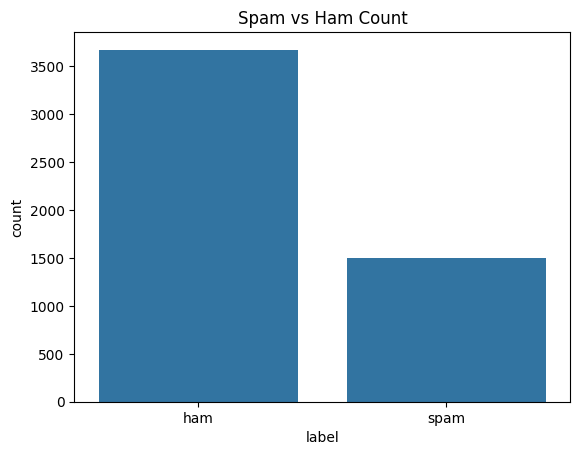

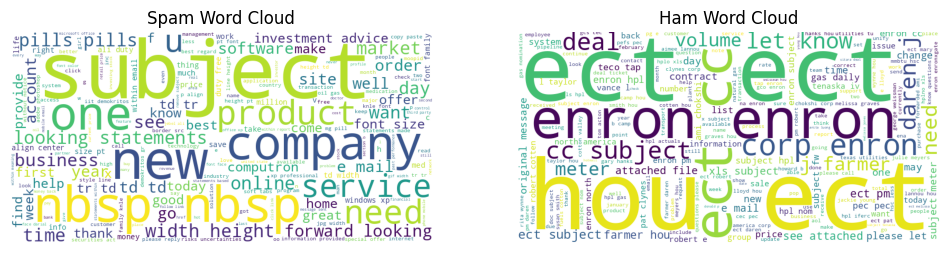

Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


104/104 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.7579 - loss: 0.5339 - val_accuracy: 0.9891 - val_loss: 0.0811
Epoch 2/5
104/104 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9917 - loss: 0.0488 - val_accuracy: 0.9867 - val_loss: 0.0392
Epoch 3/5
104/104 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9984 - loss: 0.0116 - val_accuracy: 0.9879 - val_loss: 0.0322
Epoch 4/5
104/104 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9995 - loss: 0.0048 - val_accuracy: 0.9867 - val_loss: 0.0351
Epoch 5/5
104/104 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9996 - loss: 0.0042 - val_accuracy: 0.9879 - val_loss: 0.0324
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
Confusion Matrix:
 [[739   3]
 [ 10 283]]
Accuracy: 0.9874396135265701
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
The email is classified as: spam


In [4]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, accuracy_score

# Download NLTK resources (if not already available)
nltk.download('stopwords')
nltk.download('punkt')

# Load and preprocess dataset
df = pd.read_csv('/content/spam_ham_dataset.csv')

# Basic preprocessing
df['text'] = df['text'].astype(str).str.lower()
df['text'] = df['text'].apply(lambda x: ' '.join(word for word in word_tokenize(x) if word.isalnum()))
df['text'] = df['text'].apply(lambda x: ' '.join(word for word in x.split() if word not in stopwords.words('english')))

# Check dataset
print(df.head())

# Visualize with Matplotlib and Seaborn
sns.countplot(data=df, x='label')
plt.title('Spam vs Ham Count')
plt.show()

# Word Cloud
spam_words = ' '.join(df[df['label'] == 'spam']['text'])
ham_words = ' '.join(df[df['label'] == 'ham']['text'])

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('Spam Word Cloud')
plt.imshow(WordCloud(width=800, height=400, background_color='white').generate(spam_words))
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Ham Word Cloud')
plt.imshow(WordCloud(width=800, height=400, background_color='white').generate(ham_words))
plt.axis('off')
plt.show()

# Split Data
X = df['text']
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Vectorize Text
vectorizer = TfidfVectorizer(max_features=5000)
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Define and Compile TensorFlow Model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train_vec.shape[1],)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the Model
history = model.fit(X_train_vec, y_train.map({'ham': 0, 'spam': 1}), epochs=5, batch_size=32, validation_split=0.2)

# Evaluate Performance
y_pred = model.predict(X_test_vec)
y_pred = (y_pred > 0.5).astype(int).flatten()

# Confusion Matrix
cm = confusion_matrix(y_test.map({'ham': 0, 'spam': 1}), y_pred)
print('Confusion Matrix:\n', cm)

# Accuracy
accuracy = accuracy_score(y_test.map({'ham': 0, 'spam': 1}), y_pred)
print('Accuracy:', accuracy)

# Classify New Emails
def classify_email(email_text):
    email_vec = vectorizer.transform([email_text])
    prediction = model.predict(email_vec)
    return 'spam' if prediction > 0.5 else 'ham'

# Example
new_email = "Congratulations!You are selected as software developer Intern"
print(f'The email is classified as: {classify_email(new_email)}')
